# [1] pandas

## (1) DataFrame 이해하기

- 여러 도메인(금융, 의료, 과학, 스포츠, 여행 콘텐츠 등)의 데이터를 사용하여 pandas로 데이터 프레임을 다룰 수 있다.

| 컬럼명               | 설명                                                |
|----------------------|-----------------------------------------------------|
| loan_id              | 대출을 구분하는 고유 ID                             |
| married_or_not       | 신청자의 결혼 여부 (Y: 기혼, N: 미혼)               |
| self_employed_or_not | 자영업 여부 (Y: 자영업, N: 비자영업)                |
| applicant_income     | 신청자의 월 소득        |
| loan_amount          | 대출 금액   |
| property_area        | 주택/부동산 위치 (예: Rural, City 등)               |
| loan_status          | 대출 승인 여부 (Y: 승인, N: 거절)                   |

In [1]:
import pandas as pd 
loan_df = pd.read_csv('./data/loan.csv')

- `head()`: 데이터 프레임의 첫 5행을 가져오기

In [4]:
loan_df.head(2)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N
1,LP1005,Y,Y,3000,66.0,City,Y


- `tail()`: 데이터 프레임의 마지막 5행을 가져오기

In [5]:
loan_df.tail(2)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
598,LP2984,Y,N,7583,187.6,City,Y
599,LP2990,N,Y,4583,133.2,Suburb,N


- `shape`: 데이터 프레임의 행과 열의 수 확인하기

In [10]:
loan_df.shape #행과 열을 튜플 방식으로 출력
#인덱스로 접근

loan_df.shape[0]
loan_df.shape[1]

7

- `dtypes`: 데이터프레임 안 각 컬럼의 자료형(데이터 타입) 확인하기

In [12]:
loan_df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [ ]:
loan_df.dtypes
# object : string / 문자열이라고 생각하면 됨

loan_id                  object
married_or_not           object
self_employed_or_not     object
applicant_income          int64
loan_amount             float64
property_area            object
loan_status              object
dtype: object

- `type()`: 객체 자체가 어떤 클래스인지 확인하기

In [14]:
type(loan_df)

pandas.core.frame.DataFrame

In [15]:
loan_df['loan_id'].head(1)

0    LP1003
Name: loan_id, dtype: object

In [18]:
loan_df['loan_id']

0      LP1003
1      LP1005
2      LP1006
3      LP1008
4      LP1011
        ...  
595    LP2974
596    LP2979
597    LP2983
598    LP2984
599    LP2990
Name: loan_id, Length: 600, dtype: object

In [16]:
type(loan_df['loan_id']) # 하나의 컬럼만 추출 ->series 형식

pandas.core.series.Series

In [19]:
#TypeError: 'DataFrame' object is not callable
#NameError: name 'road_df' is not defined

In [ ]:
#NameError: name 'pd' is not defined -> import pandas aas pd # 이 코드가 실행 안 된 경우 

- `info()`: 데이터프레임의 행과 열의 수, 컬럼명, 결측값 여부, 데이터 타입 확인하기

In [ ]:
loan_df.info() # ~ non-null :결측치가 아닌 걸 나타냄. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_id               600 non-null    object 
 1   married_or_not        600 non-null    object 
 2   self_employed_or_not  568 non-null    object 
 3   applicant_income      600 non-null    int64  
 4   loan_amount           589 non-null    float64
 5   property_area         600 non-null    object 
 6   loan_status           600 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.9+ KB


- `describe()`: 수치형 데이터의 기술 통계(예. 평균, 중앙값, 최솟값, 최댓값, 사분위수, 표준편차 등) 확인하기

In [ ]:
loan_df.describe() #평균과 중위수가 크게 차이가 나는가 위주로 파악 / 평균과 중위수가 크게 차이나면 분산이 큰 것. 

,applicant_income,loan_amount
count,600.000000,589.000000
mean,5412.161667,146.971307
std,6160.362669,85.756442
min,150.000000,9.200000
25%,2880.500000,100.700000
50%,3806.000000,128.000000
75%,5785.000000,168.300000
max,81000.000000,700.300000


- `describe(include='all')`: 문자형 데이터까지 포함하여 최빈값을 포함한 기술 통계량 확인하기
  - `unique`은 범주의 개수, `top`은 최빈값, `freq`은 최빈값이 등장하는 개수

In [ ]:
loan_df.describe(include='all') #unique가 600개 --> 600개 중 600개가 다 서로 다른 값. 
# 범주형, 수치형 모두 표시
# NaN : 결측치;
# freq : 빈도수

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
count,600,600,568,600.000000,589.000000,600,600
unique,600,2,2,NaN,NaN,3,2
top,LP1003,Y,N,NaN,NaN,Suburb,Y
freq,1,390,488,NaN,NaN,228,408
mean,NaN,NaN,NaN,5412.161667,146.971307,NaN,NaN
std,NaN,NaN,NaN,6160.362669,85.756442,NaN,NaN
min,NaN,NaN,NaN,150.000000,9.200000,NaN,NaN
25%,NaN,NaN,NaN,2880.500000,100.700000,NaN,NaN
50%,NaN,NaN,NaN,3806.000000,128.000000,NaN,NaN
75%,NaN,NaN,NaN,5785.000000,168.300000,NaN,NaN


In [23]:
loan_df.describe(include = 'O') # 알파벳 O 대문자 -> 범주형(object)변수만 확인

,loan_id,married_or_not,self_employed_or_not,property_area,loan_status
count,600,600,568,600,600
unique,600,2,2,3,2
top,LP1003,Y,N,Suburb,Y
freq,1,390,488,228,408


- `sort_values()`: 정렬
  - `ascending=True`: 오름차순(기본값)
  - `ascending=False`: 내림차순

In [24]:
loan_df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [26]:
loan_df.sort_values(by='loan_amount') # loan_amount 컬럼으로 오름차순 정렬

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
555,LP2840,N,N,2378,9.2,City,N
13,LP1030,Y,N,1299,17.5,City,Y
91,LP1325,N,N,3620,25.0,Suburb,Y
125,LP1482,Y,Y,3459,25.3,Suburb,Y
542,LP2792,Y,N,5468,26.5,Suburb,Y
...,...,...,...,...,...,...,...
377,LP2243,Y,N,3010,NaN,City,N
467,LP2533,Y,N,2947,NaN,City,N
512,LP2697,N,N,4680,NaN,Suburb,N
538,LP2778,Y,Y,6633,NaN,Rural,N


In [ ]:
# .의 특징 ->

In [29]:
type(loan_df.sort_values(by= 'loan_amount'))

pandas.core.frame.DataFrame

In [30]:
loan_df.sort_values(by= 'loan_amount', ascending=False).head(1) # 오름차순

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
163,LP1585,Y,N,51763,700.3,City,Y


In [31]:
loan_df.sort_values(by = ['married_or_not', 'applicant_income'], ascending = [False, True])

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
208,LP1722,Y,N,150,135.8,Rural,N
456,LP2502,Y,NaN,210,98.2,Suburb,Y
180,LP1644,Y,Y,674,168.3,Rural,Y
75,LP1259,Y,Y,1000,110.7,City,N
408,LP2345,Y,N,1025,112.5,Rural,Y
...,...,...,...,...,...,...,...
481,LP2582,N,Y,17263,225.8,Suburb,Y
522,LP2731,N,Y,18165,125.2,City,Y
122,LP1469,N,Y,20166,650.2,City,Y
299,LP1996,N,N,20233,480.9,Rural,N


In [32]:
# 줄바꿈 -> . 앞에서 \
# SyntaxError : invalid syntax -> 문법
loan_df \
        .sort_values(by = ['married_or_not','applicant_income'], ascending = [False, True]) \
        .head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
208,LP1722,Y,N,150,135.8,Rural,N


## (2) 엑셀 파일 불러오기

- 엑셀에는 `.csv` 확장자 파일과 `.xlsx` 확장자 파일이 있는데, `csv`는 `comma separated values`로 콤마(`,`) 구분자로 구분된 파일이다.
- `.csv` 파일은 `pandas`의 `read_csv()`로 불러올 수 있고, `.xlsx` 파일은 `pandas`의 `read_excel()`로 불러올 수 있다.

In [36]:
import os
print(os.getcwd())

d:\suhyeon\Workspace\코드잇_스프린트_DA_13기\8. DataFrame 마스터하기


In [38]:
# openpyxl import 에러 발생 시
# !pip install openpyxl

^C


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 653.6 kB/s eta 0:00:01
   ------------------------ --------------- 153.6/250.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
df = pd.read_excel('data/loan.xlsx', sheet_name = 1) # 두번째 인덱스를 부름
df = pd.read_excel('data/loan.xlsx', sheet_name = 'Sheet2') #시트이름을 지정해서 부름

df.head()

#Unnamed -> 컬럼이 지정되지 않은 경우

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,loan_id,married,self_employed,applicant_income,loan_amount,property_area,loan_status
3,NaN,LP1003,Y,N,4583,128,Rural,N
4,NaN,LP1005,Y,Y,3000,66,City,Y


In [43]:
df = pd.read_excel('data/loan.xlsx', sheet_name = 'Sheet2', header = 3, usecols = [1,2,3,4,5,6,7]) # 4번째 행
df = pd.read_excel('data/loan.xlsx', sheet_name = 'Sheet2', header = 3, usecols = range(1,8)) # 4번째 행
df = pd.read_excel('data/loan.xlsx', sheet_name = 'Sheet2', header = 3, usecols = 'B:H') # 4번째 행
df.head()

,loan_id,married,self_employed,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.0,Rural,N
1,LP1005,Y,Y,3000,66.0,City,Y
2,LP1006,Y,N,2583,120.0,City,Y
3,LP1008,N,N,6000,141.0,City,Y
4,LP1011,Y,Y,5417,267.0,City,Y


## (3) 인덱스 설정하기

- `set_index()` : 데이터 프레임의 특정 컬럼을 행 인덱스로 설정하여 데이터 조회와 탐색을 직관적으로 하기 위하여 자주 사용하고, 주로 고유한 식별자가 있을 때 사용한다.

In [45]:
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [48]:
df.set_index('loan_id').head(1) # set_index 만으로는 기존 데이터프레임을 변형시키지 않음

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N


In [47]:
df

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N
1,LP1005,Y,Y,3000,66.0,City,Y
2,LP1006,Y,N,2583,120.5,City,Y
3,LP1008,N,N,6000,141.4,City,Y
4,LP1011,Y,Y,5417,267.4,City,Y
...,...,...,...,...,...,...,...
595,LP2974,Y,N,3232,108.6,Rural,Y
596,LP2979,Y,N,4106,40.7,Rural,Y
597,LP2983,Y,N,8072,253.4,City,Y
598,LP2984,Y,N,7583,187.6,City,Y


In [ ]:
# 두번 실행시켜보기 -> 에러 발생할 것 / 왜 에러인지 생각해보기
# index가 변경된 상태로 유지하고 싶다!
# 방법 1 : 데이터프레임을 새롭게 정의
df = df.set_index('loan_id') # loan_id를 index로 새롭게 정의 
# 두 번 실행시 KeyError: "None of ['loan_id'] are in the columns"
# 이미 loan_id가 컬럼으로 가있기 때문

KeyError: "None of ['loan_id'] are in the columns"

In [52]:
df.head()

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N
LP1005,Y,Y,3000,66.0,City,Y
LP1006,Y,N,2583,120.5,City,Y
LP1008,N,N,6000,141.4,City,Y
LP1011,Y,Y,5417,267.4,City,Y


- `inplace=True`: 원본에 바로 적용 가능

In [ ]:
# 방법 2 inplace=True 옵션 사용

In [57]:
df = pd.read_csv('data/loan.csv')
df.set_index('loan_id', inplace = True) #새롭게 df 변수를 정의할 필요 없음
df.head(1)

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N


In [54]:
df.head(1)

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N


- `reset_index()`: 설정한 인덱스를 해제하고 싶은 경우에 사용

In [59]:
df.reset_index() # or df.reset_index(inplace=True)
df.head(2)

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N
LP1005,Y,Y,3000,66.0,City,Y


In [ ]:
# inplace = True보다 drop=True를 더 잘 사용하는 편
df.reset_index(drop=True) #drop: 리셋한 인덱스를 제거
df = df.reset_index(drop = True)
df.head(2)

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,Y,N,4583,128.4,Rural,N
1,Y,Y,3000,66.0,City,Y


In [ ]:
# # 필터하는 경우 index는 원본 데이터 그대로 유지 
# df_filter = df.loc[df['applicant_incom']>15000]
# df.sort_values('loan_amount')

In [ ]:
# 정렬하는 경우 index는 원본 데이터 그대로 유지 -> 이 상태에서 인덱스는 더이상 '순서'를 의미하지 않고 그 행의 '고유 이름'처럼 동작하게 됨
# 인덱스를 초기화하지 않은 상태에서 전처리 중 loc,iloc를 쓴다면 의도한대로 동작을 안 함(loc는 인덱스 칸에 적힌 '숫자 이름'을 찾아가고, iloc는 현재 화면에 보이는 '순서'대로 가져오기 때문) ->
# 그래서 데이터 필터 / 정렬. 전처리 후에는 항상 인덱스를 초기화해주는 작업을 해야 함.
 
df_filter = df.sort_values('loan_amount')
display(df_filter.head(2))

# 인덱스 초기화 
df_filter = df_filter.reset_index(drop=True)
display(df_filter.head(2))

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
555,N,N,2378,9.2,City,N
13,Y,N,1299,17.5,City,Y


,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,N,N,2378,9.2,City,N
1,Y,N,1299,17.5,City,Y


In [65]:
# 인덱스 값만 추출
df = pd.read_csv('data/loan.csv')
df.set_index('loan_id', inplace= True)
df.index

Index(['LP1003', 'LP1005', 'LP1006', 'LP1008', 'LP1011', 'LP1013', 'LP1014',
       'LP1018', 'LP1020', 'LP1024',
       ...
       'LP2958', 'LP2959', 'LP2960', 'LP2961', 'LP2964', 'LP2974', 'LP2979',
       'LP2983', 'LP2984', 'LP2990'],
      dtype='object', name='loan_id', length=600)

In [64]:
# multi index 
df = pd.read_csv('data/loan.csv')
df.set_index(['loan_id','married_or_not'], inplace = True)

In [67]:
df.index

Index(['LP1003', 'LP1005', 'LP1006', 'LP1008', 'LP1011', 'LP1013', 'LP1014',
       'LP1018', 'LP1020', 'LP1024',
       ...
       'LP2958', 'LP2959', 'LP2960', 'LP2961', 'LP2964', 'LP2974', 'LP2979',
       'LP2983', 'LP2984', 'LP2990'],
      dtype='object', name='loan_id', length=600)

## (4) 컬럼명 설정하기

(방법1: `.columns` 사용)

- `.columns`: 컬럼명을 출력하고 싶은 경우

In [68]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [ ]:
# 컬럼들만 추출 
# # 인덱싱도 가능
print(df.columns)
df.columns[0]

Index(['loan_id', 'married_or_not', 'self_employed_or_not', 'applicant_income',
       'loan_amount', 'property_area', 'loan_status'],
      dtype='object')


'loan_id'

In [74]:
# 새롭게 정의하고 싶은 경우 리스트로 해당 원소 숫자만큼 넣어주기
df.columns = [1,2,3,4,5,6,'aaaa']
df.head(1)

,1,2,3,4,5,6,aaaa
0,LP1003,Y,N,4583,128.4,Rural,N


(방법2: `rename()` 사용)

- 딕셔너리를 활용해서 바꿔야할 컬럼명에 대해서만 지정해줄 수 있다.

In [75]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [76]:
# .rename({a:b})
# 특정값을 a->b로 업데이트
# loan_id -> id / loan_status -> status

df.rename(columns = {"loan_id":'id',"loan_status":'status'}) #함수만 실행시켜서는 반영이 안 됨
df.head(2)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N
1,LP1005,Y,Y,3000,66.0,City,Y


In [77]:
# 아래 두가지 방법으로 변경가능
df = df.rename(columns = {"loan_id":"id", "loan_status": "status"})
df.rename(columns = {"loan_id":"id","loan_status":"status"}, inplace = True)

## (5) 데이터 타입 설정하기

In [78]:
import pandas as pd
df = pd.read_csv('data/loan.csv')

In [82]:
df.dtypes

loan_id                  object
married_or_not           object
self_employed_or_not     object
applicant_income          int64
loan_amount             float64
property_area            object
loan_status              object
dtype: object

- `applicant_income`이라는 컬럼이 정수형(`int`)으로 들어가있는데, 실수형(`floating point`)으로 변경할 수 있다.

In [83]:
# 타입변경 메소드.astype
df['applicant_income'].astype('float').dtype

dtype('float64')

In [84]:
df['applicant_income'].dtype # 여전히 int

dtype('int64')

In [85]:
# 새롭게 컬럼을 정의하던가 inplace 파라미터 True 설정-> 오류 발생해서 잘 안 씀. 
df['applicant_income'] = df['applicant_income'].astype('float').dtype
df['applicant_income'].dtype

dtype('O')

- `applicant_income`이라는 컬럼이 실수형(`floating point`)으로 들어가있는데, 정수형(`int`)으로 변경할 수 있다.

In [86]:
df['applicant_income'] = df['applicant_income'].astype('int').dtype
df['applicant_income'].dtype

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'numpy.dtypes.Float64DType'

- `income`이라는 컬럼이 정수형(`int`)으로 들어가있는데, 문자형(`str`)으로 변경할 수 있다.
- 문자형으로 바꿀 때는 str을 사용해도 되고, object를 사용해도 된다.

### 실습) DataFrame 살펴보기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6590)


## (6) Series 살펴보기
- 하나의 컬럼요소로만 이루어진 데이터 모음
- dataframe은 series들의 모임

In [90]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df = df.set_index('loan_id')
df.head(2)

,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
loan_id,,,,,,
LP1003,Y,N,4583,128.4,Rural,N
LP1005,Y,Y,3000,66.0,City,Y


In [91]:
# 데이터프레임에서 컬럼으로 슬라이싱 할 때 -> 대괄호를 2개 쓰면 데이터프레임으로 추출 / 대괄호 1개 쓰면 시리즈로 추출
# 대괄호를 2개 쓴 경우에는 여러 개의 컬럼을 가져올 수 있음. 
#대괄호에 리스트 하나의 넣는다고 간주하면 됨. 
type(df[['loan_amount']]), type(df['loan_amount'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## (7) 문자형 데이터에 쓰기 좋은 함수들

- `unique()`: 범주의 종류

In [2]:
import pandas as pd
df= pd.read_csv('data/loan.csv')

In [ ]:
df['self_employed_or_not'].unique() #nan: 결측치

array(['N', 'Y', nan], dtype=object)

In [4]:
type(df['self_employed_or_not'])

pandas.core.series.Series

In [ ]:
#nunique()
df['self_employed_or_not'].nunique() # 유일한 값의 숫자를 표현 / 결측치는 제외 

2

In [6]:
df.nunique() # 데이터 프레임에서도 nunique는 동작

loan_id                 600
married_or_not            2
self_employed_or_not      2
applicant_income        494
loan_amount             471
property_area             3
loan_status               2
dtype: int64

- value_counts()
    - dropna = True : 결측치 제외(default)
    - dropna = False : 결측치 포함
    - normalize = True: 범주별 비율

In [ ]:
df['self_employed_or_not'].value_counts() #고윳값 수

self_employed_or_not
N    488
Y     80
Name: count, dtype: int64

In [8]:
df['self_employed_or_not'].value_counts(dropna=False) #dropna=False : 결측치 포함

self_employed_or_not
N      488
Y       80
NaN     32
Name: count, dtype: int64

In [ ]:
df['self_employed_or_not'].value_counts(normalize=True) #normalize=True :범주별 비율
df['self_employed_or_not'].value_counts(normalize=True, dropna=False) #->NaN의 범주별 비율도 표시 

self_employed_or_not
N      0.813333
Y      0.133333
NaN    0.053333
Name: proportion, dtype: float64

### 실습) Series 살펴보기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6605)

## (8) 여러 조건으로 불린 인덱싱하기

- 인덱싱(`indexing`) : 데이터에서 원하는 부분을 선택하는 것
- `iloc`(`integer location`) : 숫자 위치를 기준으로 인덱싱
- `loc`(`label location`) : 인덱스 이름(레이블)을 기준으로 인덱싱
- 불린 인덱싱 : 조건(`True/False`)에 따라 데이터를 필터링
- 다중 조건 인덱싱 : 여러 조건을 조합, `AND(&)`, `OR(|)`, `NOT(~)`
  - 논리 연산자에는 크게 `AND`, `OR`, `NOT`이 있는데 각 논리 연산자의 우선 순위는 `NOT > AND > OR`이다.

In [10]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


(예시1) 결혼을 했**고**, 수입이 평균보다 큰 경우

In [ ]:
#기혼자 필터
# 방법1 - mask 변수 지정 ; 코드의 가독성이 좋다는 장점이 있음. 
# mask = df['married_or_not'] ==  'Y'

mask_married = df['married_or_not'] == 'Y' 
mask_overincome = df['applicant_income'] > df['applicant_income'].mean()
df_and = df.loc[mask_married & mask_overincome]

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
4,LP1011,Y,Y,5417,267.4,City,Y
8,LP1020,Y,N,12841,349.3,Suburb,N
19,LP1043,Y,N,7660,104.1,City,N
20,LP1046,Y,N,5955,315.5,City,Y
24,LP1066,Y,Y,9560,191.1,Suburb,Y
...,...,...,...,...,...,...,...
586,LP2948,Y,N,5780,192.9,City,Y
589,LP2953,Y,N,5703,128.5,City,Y
591,LP2959,Y,N,12000,497.0,Suburb,Y
597,LP2983,Y,N,8072,253.4,City,Y


In [20]:
# 방법2 - 조건을 바로 loc 안에 넣어서 동작 / 위에 방법1을 한줄로 표현 /좀 더 효율적으로 가능
mask1 = df.loc[(df['married_or_not'] == 'Y') & (df['applicant_income'] > df['applicant_income'].mean())]

In [16]:
df['applicant_income'].mean() #평균

np.float64(5412.161666666667)

In [18]:
df['applicant_income'] = df['applicant_income'].astype('str')
# df['applicant_income'].mean() # 에러 발생/수식 연산 시 타입 확인 필요
df['applicant_income'] = df['applicant_income'].astype('float')

In [19]:
# 수입 평균 비교
# 방법 1
income_mean = df['applicant_income'].mean()
mask2 = df['applicant_income'] > income_mean # 평균
df.loc[mask2] #df[mask2]

# 방법 2
df.loc[df['applicant_income'] > df['applicant_income'].mean()]

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
3,LP1008,N,N,6000.0,141.4,City,Y
4,LP1011,Y,Y,5417.0,267.4,City,Y
8,LP1020,Y,N,12841.0,349.3,Suburb,N
19,LP1043,Y,N,7660.0,104.1,City,N
20,LP1046,Y,N,5955.0,315.5,City,Y
...,...,...,...,...,...,...,...
586,LP2948,Y,N,5780.0,192.9,City,Y
589,LP2953,Y,N,5703.0,128.5,City,Y
591,LP2959,Y,N,12000.0,497.0,Suburb,Y
597,LP2983,Y,N,8072.0,253.4,City,Y


In [22]:
# 두 조건 모두 연결 -> AND 연결 -> 각 조건을 &

# 방법1
# mask1 = ~ 
# maks2 = ~
df.loc[mask1 & mask2]
df[mask1 & mask2]

# 방법2
# 각 조건을 그대로 쓰는 경우에는 괄호를 꼭 넣어줘야 한다. 
# df.loc[df['married_or_not'] == 'Y' | df['applicant_income'] > df['applicant_income'].mean()]

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [26]:
# 조건문으로 필터한 데이터는 별도 변수로 관리한다
df_filter = df[(df['married_or_not'] == 'Y') & (df['applicant_income'] > df['applicant_income'].mean())] \
            .reset_index(drop=True)
df_filter.head(5)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1011,Y,Y,5417.0,267.4,City,Y
1,LP1020,Y,N,12841.0,349.3,Suburb,N
2,LP1043,Y,N,7660.0,104.1,City,N
3,LP1046,Y,N,5955.0,315.5,City,Y
4,LP1066,Y,Y,9560.0,191.1,Suburb,Y


(예시2) 결혼을 했**거나**, 수입이 평균보다 큰 경우

In [ ]:
# 조건을 변수화해서 풀면 코드가 가독성이 좋음
mask_married = df['married_or_not'] == 'Y' 
mask_overincome = df['applicant_income'] > df['applicant_income'].mean()
df_or = df.loc[mask_married | mask_overincome]
df_or.shape

(442, 7)

In [16]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


(예시3) 1) 결혼을 했**거나**, 2) 수입이 전체 평균보다 크**고**, 부동산이 도시에 있지 않은 경우

In [ ]:
# 1번 조건과 2번 조건을 OR 연산자로 연결 / 2번 조건은 내부에서 AND로 연결
# 각 논리 연산자의 우선 순위는 괄호 > NOT > AND > OR
# 컬럼 복붙.
mask_married = df['married_or_not'] == 'Y' 
mask_income_notcity = (df['applicant_income'] > df['applicant_income'].mean()) & (df['property_area'] != 'City')
df_3 = df.loc[mask_married | mask_income_notcity ]
df_3.shape

(426, 7)

In [ ]:
mask_married = df['married_or_not'] == 'Y' 
# ~(부정형): not
mask_income_notcity = (df['applicant_income'] > df['applicant_income'].mean()) & ~(df['property_area'] == 'City')
df_3 = df.loc[mask_married | mask_income_notcity ]
df_3.shape

(426, 7)

In [12]:
df_3 = df.loc[(df['married_or_not'] == 'Y') \
 | (df['applicant_income'] > df['applicant_income'].mean()) & ~(df['property_area'] == 'City')]
df_3.shape[0]

426

(예시3) married_or_not 가 Y 고, applicant_income가 applicant_income의 Q1보다 크며
        loan_amount가 loan_amount의 (평균 - 표준편차)보다 작은 행들

In [18]:
import pandas as pd
df = pd.read_csv('data/loan.csv')
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [19]:
# Q1 : .quantile(0.25)
mask_married = df['married_or_not'] == 'Y' 
mask_overQ1 = df['applicant_income'] > df['applicant_income'].quantile(0.25) 
mask_loan = df['loan_amount'] < df['loan_amount'].mean() - df['loan_amount'].std()
df_4 = df.loc[mask_married & mask_overQ1 & mask_loan]
df_4.shape[0]

10

### 실습) 여러 개의 조건으로 불린 인덱싱하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6607)

- 대출이 승낙된 사람들 중에서 자영업자가 아니고, 수입이 중간값 이상인 사람들

대출 신청자들을 여러 개의 그룹으로 나누려고 합니다. 일단 대출이 승낙된 사람들 중에서 자영업자가 아니고, 수입이 중간값 이상인 사람들을 추출하려고 하는데요. 불린 인덱싱을 사용해서 세 가지 조건을 모두 만족하는 데이터를 group1이라는 변수에 저장해 주세요.

주의 사항: 채점을 위해 가장 마지막 줄에는 group1이라고 입력해서 DataFrame을 출력해 주세요.(이때 print()를 빼고 코드를 작성해 주세요)

In [33]:
df.head()

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583.0,128.4,Rural,N
1,LP1005,Y,Y,3000.0,66.0,City,Y
2,LP1006,Y,N,2583.0,120.5,City,Y
3,LP1008,N,N,6000.0,141.4,City,Y
4,LP1011,Y,Y,5417.0,267.4,City,Y


In [22]:
# 결측치 고려하여 자영업자가 아니라고 정확히 찝어주는 것이 좋음 
group1 = df.loc[((df['loan_status'] == 'Y') & (df['self_employed_or_not'] == 'N')) & (df['applicant_income'] >= df['applicant_income'].median())]
group1.shape[0]

159

In [24]:
# 마스크
mask1 = df['loan_status'] == 'Y'
mask2 = df['self_employed_or_not'] == 'N'
mask3 = df['applicant_income'] >= df['applicant_income'].median()
df[mask1 & mask2 & mask3].shape[0]


159

## (9) query() 함수로 불린 인덱싱하기

- `query()`: DataFrame에서 조건식을 '문자열'로 작성해 행을 필터링

**작성**

- `df.query('조건식')`

**기능**

- 문자열 조건식을 사용해 행(row)을 필터링
- 불린 인덱싱보다 코드가 짧고 가독성이 좋음
- 여러 조건 결합 시 가독성이 특히 좋음

**@: 변수 참조 연산자**

- `@`: `query()` 안에서 외부 변수를 참조하는 기호

(예시1) income이 5000 보다 큰 경우

In [27]:
qdf = df.query('applicant_income > 5000')
qdf.shape[0]

187

(예시2) income이 평균보다 큰 경우

In [ ]:
#외부에서 변수로 정의하고, query에서 @변수명로 가져와 사용
income_mean = df['applicant_income'].mean()
qdf2 = df.query('applicant_income > @income_mean')
qdf2.shape[0]

172

(예시3) 부동산 타입이 도시인 경우

In [32]:
qdf3 = df.query('property_area == "City"') #문자열 비교의 경우 문자열에 따옴표가 있어야 함qdf3.shape
qdf3 = df.query("property_area == 'City'")
qdf3.shape[0]

197

(예시4) 부동산 타입이 도시 또는 교외인 경우

In [31]:
qdf4 = df.query('property_area in ("City","Suburb")')
qdf4.shape[0]

425

(예시5) 부동산 타입이 도시 또는 교외가 아닌 경우

In [33]:
qdf5 = df.query('property_area not in ("City","Suburb")')
qdf5.shape[0]

175

In [34]:
df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


(예시6) 결혼을 했고, 수입이 평균보다 큰 경우

In [39]:
income_mean = df["applicant_income"].mean()
qdf6 = df.query('(married_or_not == "Y") & (applicant_income > @income_mean)')
qdf6.shape[0]

120

## (10) 데이터 삭제하기

**drop()함수와 axis**

- `drop()`: DataFrame에서 특정 행(row)이나 열(column)을 제거

**기본 개념**

- 지정한 라벨(label: 행 인덱스나 열 이름)을 기준으로 데이터를 제거하는데, 행/열 중 어디를 삭제할지 `axis`로 지정 가능
  - `axis=0`: 행(row) 삭제(기본값)
  - `axis=1`: 열(column) 삭제

(예시1: drop()과 axis 이해하기)

In [2]:
import pandas as pd

In [3]:
loan_df = pd.read_csv('data/loan.csv')
loan_df.head(1)

,loan_id,married_or_not,self_employed_or_not,applicant_income,loan_amount,property_area,loan_status
0,LP1003,Y,N,4583,128.4,Rural,N


In [ ]:
loan_df.drop(1) # loan_df.rop(600) 이건 에러

# 새롭게 변수를 업데이트하거나 inplace 옵션을 써줘야 반영

In [ ]:
# loan_df.drop('married_or_not') #에러나는 이유는 drop의 default 옵션은 행방향
loan_df.drop('married_or_not', axis= 1) #방법1) axis 매개변수 사용 axis = 1 수직방향 axis= 0 수평방향 -> default
loan_df.drop(columns = 'married_or_not') #방법2 columns 매개변수 사용

# 여러 개 컬럼을 제거하는 경우-> columns 매개변수에 리스트로 넣어줌. 
loan_df = loan_df.drop(columns = ['married_or_not', 'self_employed_or_not', 'property_area'])
# inplace나 새롭게 변수 설정해줘야 함.
loan_df


,loan_id,applicant_income,loan_amount,loan_status
0,LP1003,4583,128.4,N
1,LP1005,3000,66.0,Y
2,LP1006,2583,120.5,Y
3,LP1008,6000,141.4,Y
4,LP1011,5417,267.4,Y
...,...,...,...,...
595,LP2974,3232,108.6,Y
596,LP2979,4106,40.7,Y
597,LP2983,8072,253.4,Y
598,LP2984,7583,187.6,Y


(예시2: 행 삭제)

(예시3: 열 삭제)

(예시4: 여러 개 열 삭제하기)

- 리스트에 삭제할 열들을 지정한 후 여러 개의 열을 삭제할 수 있다.

### 실습) 데이터 삭제하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6610)

(방법1: 열 삭제 시 `axis=1` 옵션 추가)

(방법2: 열 삭제 시 `columns` 지정)

## (11) 데이터 내보내기

In [6]:
import pandas as pd
loan_Df = pd.read_csv('data/loan.csv')

#~~~전처리 완료

In [8]:
#csv로 저장
#저장주소는 상대경로 / 절대경로로 표현
# 파일명과 확장자 .csv가 들어가야 함. 
# index를 넣을지 말지 선택

loan_df.to_csv('loan_save.csv') #경로 미표시 시 소스파일이 있는 폴더에 저장됨. 

In [9]:
loan_df_save = pd.read_csv('loan_save.csv')
loan_df_save.head(2) #index가 그대로 컬럼으로 들어옴

,Unnamed: 0,loan_id,applicant_income,loan_amount,loan_status
0,0,LP1003,4583,128.4,N
1,1,LP1005,3000,66.0,Y


In [12]:
loan_df.to_csv('loan_save_2.csv', index=False) #인덱스 없이 csv파일로 저장
loan_df_save2 = pd.read_csv('loan_save_2.csv')
loan_df_save2.head()

,loan_id,applicant_income,loan_amount,loan_status
0,LP1003,4583,128.4,N
1,LP1005,3000,66.0,Y
2,LP1006,2583,120.5,Y
3,LP1008,6000,141.4,Y
4,LP1011,5417,267.4,Y


In [14]:
# 현재 경로 확인
import os
os.getcwd()

'd:\\suhyeon\\Workspace\\코드잇_스프린트_DA_13기\\8. DataFrame 마스터하기'

In [15]:
loan_df.to_excel('loan_save.xlsx')

# [2] 데이터 전처리하기

## (1) 결측값 확인하기

- GIGO(Garbage In, Garbage Out)

| 컬럼명         | 설명                                   |
|----------------|----------------------------------------|
| id             | 숙소 고유 식별자 ID                    |
| state          | 숙소가 위치한 주                |
| guests         | 수용 가능한 게스트(투숙객) 수          |
| beds           | 제공되는 침대 수                       |
| property_type  | 숙소 유형(예: Apartment, House 등)    |
| rating         | 숙소 평점(0~100, NaN은 평점 없음)     |
| n_reviews      | 리뷰 개수                              |
| location       | 상세 위치(도시, 지역)                 |
| price          | 1박 숙박 요금(통화 단위는 상황에 따라)|

In [19]:
airbnb_df = pd.read_csv("data/airbnb.csv")
airbnb_df.head(2)

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115


- `isna()`, `isnull()`: 결측치 확인 시 사용

In [23]:
airbnb_df.isna().head(1) #모든 값이 결측치인지 아닌지 boolean으로 표기 

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,False,False,False,False,False,False,False,False,False


In [24]:
# 컬럼별 결측치 확인 방법
airbnb_df.isna().sum() # True 1 / False  # aribnb_df.isnull().sum() 같은 함수가 있다. 

id                0
state             0
guests            0
beds              0
property_type     0
rating           13
n_reviews         0
location          0
price             0
dtype: int64

In [27]:
# 결측치를 포함하는 행들을 뽑고 싶다.

airbnb_df.isna().any(axis=1) #결측치가 존재하는 불리언 마스킹이 된다. # any는 해당 행 기준으로 1개라도 값이 True이면 True 반환
airbnb_df[airbnb_df.isna().any(axis=1)]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
127,MB7199,Illinois,2,1,Apartment,NaN,0,"Rogers Park, Chicago.",74
189,DE6323,illinois,2,1,Condominium,NaN,0,"South Loop/Printers Row, Chicago.",79
206,ME5527,ILLINOIS,2,1,House,NaN,0,"Garfield Park, Chicago.",52
272,RM9271,illinois,2,1,Apartment,NaN,0,"Lincoln Park, Chicago.",64
275,TA9777,California,2,1,Condominium,NaN,0,"Pacific Heights, San Francisco.",115
366,LP6045,ILLINOIS,2,1,Apartment,NaN,0,"Loop, Chicago.",115
534,DC4208,ILLINOIS,5,3,House,NaN,0,"Little Italy/UIC, Chicago.",100
546,IE7576,illinois,1,1,House,NaN,0,"South Chicago, Chicago.",50
552,DY9962,California,1,1,Condominium,NaN,0,"Valley Village, Los Angeles.",85


In [26]:
# rating 컬럼이 결측치가 있다면 해당 행들만 필터
airbnb_df['rating'].isna() #불리언마스킹
airbnb_df[airbnb_df['rating'].isna()]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
127,MB7199,Illinois,2,1,Apartment,NaN,0,"Rogers Park, Chicago.",74
189,DE6323,illinois,2,1,Condominium,NaN,0,"South Loop/Printers Row, Chicago.",79
206,ME5527,ILLINOIS,2,1,House,NaN,0,"Garfield Park, Chicago.",52
272,RM9271,illinois,2,1,Apartment,NaN,0,"Lincoln Park, Chicago.",64
275,TA9777,California,2,1,Condominium,NaN,0,"Pacific Heights, San Francisco.",115
366,LP6045,ILLINOIS,2,1,Apartment,NaN,0,"Loop, Chicago.",115
534,DC4208,ILLINOIS,5,3,House,NaN,0,"Little Italy/UIC, Chicago.",100
546,IE7576,illinois,1,1,House,NaN,0,"South Chicago, Chicago.",50
552,DY9962,California,1,1,Condominium,NaN,0,"Valley Village, Los Angeles.",85


## (2) 결측값 처리하기

| 방법                | 설명                                                                 |
|---------------------|----------------------------------------------------------------------|
| 결측값 삭제하기      | 결측값이 적어 전체 분석에 영향이 거의 없을 때 해당 행 삭제 |
| 행/열 삭제           | 특정 행이나 열에 데이터 대부분이 결측값일 경우 해당 행/열을 통째로 삭제             |
| 결측값 대체하기      | 결측값을 다른 값으로 채워 넣는 방식                                     |
| ㆍ 수치형 데이터     | 평균(mean)이나 중앙값(median)으로 대체                                 |
| ㆍ 범주형 데이터     | 최빈값(mode, 가장 자주 등장하는 값)으로 대체                           |

- `dropna()`: 결측치 삭제하기
- `fillna()`: 결측치 대체하기

(결측치 삭제하기)

2024년 gdp 3.5  
205년 NaN -> 직전 직후 결측값으로 대체.   
2026년 gdp 3.5  

In [28]:
airbnb_df = pd.read_csv("data/airbnb.csv")
airbnb_df.head(2)

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115


In [30]:
airbnb_df.dropna().head(2) #defualt가 행이 제거(1개라도 결측치가 있는 행을 제거)

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150


In [31]:
airbnb_df_remove_na = airbnb_df.dropna()

In [32]:
airbnb_df_remove_na = airbnb_df.dropna()

airbnb_df_remove_na.isnull().sum()
airbnb_df.isnull().sum()

# axis=1 옵션은 컬럼 제거 rating 컬럼이 제거됨
airbnb_df.dropna(axis=1)


,id,state,guests,beds,property_type,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,15,"Lakeview, Chicago.",115


In [ ]:
airbnb_df['rating'].describe() #값이 전반적으로 오른쪽으로 치우쳐져 있음

count    700.000000
mean      94.820000
std        6.175233
min       40.000000
25%       93.000000
50%       96.000000
75%       99.000000
max      100.000000
Name: rating, dtype: float64

(결측치 대체하기)

In [34]:
airbnb_df = pd.read_csv("data/airbnb.csv")
airbnb_df.head(2)

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115


In [35]:
#평균으로 대치 
mean = airbnb_df['rating'].mean()
airbnb_df['rating'] = airbnb_df['rating'].fillna(mean) #업데이트를 해줘야 한다. 또는 inplace=True 옵션

In [36]:
airbnb_df.isna().sum()

id               0
state            0
guests           0
beds             0
property_type    0
rating           0
n_reviews        0
location         0
price            0
dtype: int64

In [ ]:
df = pd.DataFrame(
    {'a': [1,None,2,3],
     'b': [1,None,2,None],
     'c': [1,2,None,3]
    }
)
display(df)
display(df.ffill()) #fill() : 앞에 것을 가져옴. 
display(df.ffill())

,a,b,c
0,1.0,1.0,1.0
1,NaN,NaN,2.0
2,2.0,2.0,NaN
3,3.0,NaN,3.0


,a,b,c
0,1.0,1.0,1.0
1,1.0,1.0,2.0
2,2.0,2.0,2.0
3,3.0,2.0,3.0


,a,b,c
0,1.0,1.0,1.0
1,1.0,1.0,2.0
2,2.0,2.0,2.0
3,3.0,2.0,3.0


### 실습) 결측값 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6614)

## (3) 중복값 확인하기

- 중복값 : 중복되어 있는 값

- `duplicated()`를 사용하여 쉽게 확인할 수 있다.

| 옵션           | 설명                                                                 | 기본값 |
|----------------|----------------------------------------------------------------------|--------|
| subset         | 중복 여부를 확인할 **특정 컬럼** 지정 가능 (리스트 형태도 가능)        | None (전체 컬럼 기준) |
| keep           | 중복된 값 중 어떤 것을 True로 표시할지 결정                           | 'first' |
| ㆍ 'first'     | 처음 등장한 행은 남기고, 이후 중복된 행을 True로 표시                 |        |
| ㆍ 'last'      | 마지막 등장한 행은 남기고, 이전 중복된 행을 True로 표시               |        |
| ㆍ False       | 중복된 모든 행을 True로 표시                                          |        |
| inplace        | DataFrame에 바로 적용할지 여부 (실제 `drop_duplicates()`에서 주로 사용) | False  |

In [39]:
import pandas as pd
airbnb_df = pd.read_csv('data/airbnb.csv')

(예시1: 모든 컬럼에 대하여 중복 여부 확인하기)

- `.duplicated().sum()`을 사용하면 중복이 있는 행의 수를 출력할 수 있다.

In [ ]:
airbnb_df.duplicated() #모든 행의 값이 동일하면 True / 하나라도 다르면 False
airbnb_df.duplicated().sum() #2: 중복되는 부분이 있다. 

np.int64(2)

- `duplicated()`를 사용하면 중복이 있는지 없는지 여부가 불린으로 출력된다.

In [ ]:
airbnb_df[airbnb_df.duplicated()] # 첫 중복행을 제거

,id,state,guests,beds,property_type,rating,n_reviews,location,price
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124


In [ ]:
airbnb_df[airbnb_df.duplicated(keep=False)] #모든 중복행을 표기

,id,state,guests,beds,property_type,rating,n_reviews,location,price
201,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124


(예시2: 특정 컬럼에 대하여 중복 여부 확인하기)  
- id컬럼

In [ ]:
#airbnb_df[airbnb_df.duplicated(subset='id',keep=False)].sort_values('id')
mask = airbnb_df.duplicated(subset='id',keep=False)
airbnb_df[mask].sort_values('id')

# 참고
airbnb_df.duplicated(keep=False).sum() #모든 행이 동일한 모든 행의 숫자

,id,state,guests,beds,property_type,rating,n_reviews,location,price
541,BZ3596,Illinois,2,1,Apartment,91.0,28,"Lakeview, Chicago.",119
601,BZ3596,Illinois,2,1,House,89.0,30,"Lakeview, Chicago.",119
6,LN3479,California,2,2,Apartment,96.0,15,"East Hollywood, Los Angeles.",88
448,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
452,LN3479,California,2,2,Apartment,99.0,25,"East Hollywood, Los Angeles.",91
273,QO8555,California,7,4,House,85.0,3,"Excelsior, San Francisco.",199
527,QO8555,California,7,4,House,80.0,1,"Excelsior, San Francisco.",199
201,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
493,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
496,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124


## (4) 중복값 처리하기

`drop_duplicates()`: DataFrame에서 중복된 행을 제거
  - `keep='first'`(기본값): 중복된 행이 여러 개 있는 경우, 첫 번째만 남기고 나머지는 제거
  - `keep='last'`: 마지막 것만 남기고 앞의 중복 제거
  - `keep=False`: 중복된 모든 행 제거

(예시1: id 컬럼에 대하여 중복값 처리하기)

In [45]:
airbnb_df = pd.read_csv('data/airbnb.csv')
airbnb_df['id'].value_counts() # 내림차순 정렬

id
LN3479    3
UD8253    3
QO8555    2
BZ3596    2
DB7921    1
         ..
XG3289    1
ZR5298    1
XZ5531    1
EE8333    1
AA6024    1
Name: count, Length: 707, dtype: int64

In [46]:
# 중복이 있는 상위 4개 기종 추출

airbnb_df['id'].value_counts().index[:4]

Index(['LN3479', 'UD8253', 'QO8555', 'BZ3596'], dtype='object', name='id')

In [48]:
# .duplicated로 확인하고 drop_duplicates로 삭제

# drop_duplicates의 동작방식 
dup_df = airbnb_df[airbnb_df.duplicated('id', keep= False)].sort_values('id').reset_index(drop=True)

display(dup_df)
display(airbnb_df.drop_duplicates('id', keep= False))
display(airbnb_df.drop_duplicates('id', keep= False))

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BZ3596,Illinois,2,1,Apartment,91.0,28,"Lakeview, Chicago.",119
1,BZ3596,Illinois,2,1,House,89.0,30,"Lakeview, Chicago.",119
2,LN3479,California,2,2,Apartment,96.0,15,"East Hollywood, Los Angeles.",88
3,LN3479,California,2,2,Apartment,98.0,19,"East Hollywood, Los Angeles.",88
4,LN3479,California,2,2,Apartment,99.0,25,"East Hollywood, Los Angeles.",91
5,QO8555,California,7,4,House,85.0,3,"Excelsior, San Francisco.",199
6,QO8555,California,7,4,House,80.0,1,"Excelsior, San Francisco.",199
7,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
8,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124
9,UD8253,MASSACHUSETTS,3,1,Apartment,100.0,1,"Fenway/Kenmore, Boston.",124


,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


(예시2: id, price 컬럼에 대하여 중복값 처리하기)

- `subset` 안에 리스트 형식으로 넣을 수 있다.

In [50]:
airbnb_df = pd.read_csv('data/airbnb.csv')
dup_df = airbnb_df[airbnb_df.duplicated(['id','price'],keep=False)].sort_values('id').reset_index(drop=True)
dup_df[['id','price']]

,id,price
0,BZ3596,119
1,BZ3596,119
2,LN3479,88
3,LN3479,88
4,QO8555,199
5,QO8555,199
6,UD8253,124
7,UD8253,124
8,UD8253,124


In [ ]:
airbnb_df.shape

(713, 9)

In [52]:
airbnb_df.drop_duplicates(['id','price']).shape # id과 price가 중복인 5행이 줄어듦.

(708, 9)

### 실습) 중복값 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6617)

## (5) 이상점 확인하기

- 이상점(outlier) : 다른 값들과 동떨어져 있는 너무 크거나 너무 작은 데이터

## (6) 이상점 처리하기

1. **그대로 두기**  
   - 데이터의 특성을 잘 반영할 수도 있는 경우

2. **삭제하기**  
   - 이상값이 데이터 입력 오류나 측정 실수로 발생한 경우
   - 해당 데이터를 제거해도 전체 분석에 큰 영향이 없을 경우  

3. **정상 범위로 조정하기**  
   - IQR을 활용해 이상값을 판단하고 정상 범위(Q1 - 1.5 × IQR ~ Q3 + 1.5 × IQR)를 벗어나는 값은 조정하거나 별도 처리

In [3]:
import pandas as pd

airbnb_df = pd.read_csv('data/airbnb.csv')

<Axes: >

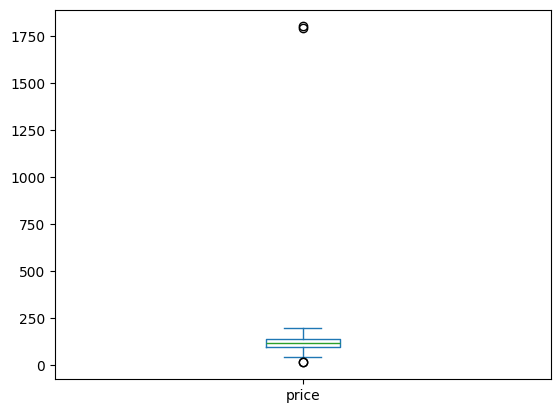

In [4]:
# price 컬럼 정보 확인

airbnb_df['price'].plot(kind='box')

In [ ]:
# IQR 기반으로 price 컬럼의 이상치 처리--> 공식처럼 기억해두기
q3 = airbnb_df['price'].quantile(0.75)
q1 = airbnb_df['price'].quantile(0.25)

IQR = q3 - q1

upper_limit = q3 + 1.5 *IQR
lower_limit = q1 - 1.5 *IQR

print('q3', q3, 'q1', q1, 'IQR', IQR, 'upper_limit', upper_limit, 'lower_limit', lower_limit)

# price컬럼에서 lower_limit보다 작고 upper_limit 큰 값이 있다면 제외, 사이 범위 값들만 필터
# 이상치만 필터
mask = airbnb_df['price'] < lower_limit
mask2 = airbnb_df['price'] > upper_limit
airbnb_df[mask | mask2]

# 이상치를 제외한 데이터 추출
# 방법 1 --> 위에서 필터한 조건의 부정형
df_filter = airbnb_df[~(mask | mask2)]

# 방법 2 --> 새롭게 조건을 만들어서
mask3 = airbnb_df['price'] >= lower_limit
mask4 = airbnb_df['price'] <= upper_limit
df_filter2 = airbnb_df[mask3 & mask4]
df_filter2.shape

q3 139.0 q1 98.0 IQR 41.0 upper_limit 200.5 lower_limit 36.5


(709, 9)

### 실습) 이상점 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6620)

효준이는 스마트폰 구매 후보에서 가격이 너무 싸거나 비싼 건 제외하려고 합니다. cellphone_df에서 가격을 기준으로 이상점으로 볼 수 있는 데이터는 삭제해 주세요.

주의 사항: 채점을 위해 가장 마지막 줄에는 cellphone_df라고 입력해서 DataFrame을 출력해 주세요.

In [ ]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')

# 여기에 코드를 작성하세요.




# [3] 문자 데이터 가공하기

## (1) 대소문자 처리하기

1. **`.upper()`**: 문자열의 모든 문자를 **대문자**로 변환
   - 예: `"python".upper()` → `"PYTHON"`

2. **`.lower()`**: 문자열의 모든 문자를 **소문자**로 변환  
   - 예: `"PyThOn".lower()` → `"python"`

3. **`.capitalize()`**: 문자열의 맨 앞 글자만 **대문자**로, 나머지는 소문자로 변환  
   - 예: `"pyTHon".capitalize()` → `"Python"`


In [8]:
"python".upper()

'PYTHON'

In [ ]:
# str 변수에 적용 가능한 빌드인 메소드들
string_variable = "python"
string_variable.upper()
string_variable.isnnumeric() #이 변수가 숫자인지

'PYTHON'

In [11]:
airbnb_df = pd.read_csv('data/airbnb.csv')

In [12]:
# state 컬럼에 upper사용. -> series에는 upper메소드 없다고 나옴.
# Series(하나의 열)을 호출하고 .str을 사용하면 string 빌트인 메소드를 모두 사용 가능
airbnb_df['state'] = airbnb_df['state'].str.upper()
airbnb_df['lower_str'] = airbnb_df['state'].str.upper()

## (2) 문자열 분리하기

- `split()`: 문자열 분리

In [1]:
# 공백을 기준으로 제거가 default / 특정 값을 기준으로 제거하고 싶으면 괄호입력
'test abc'.split() , 'test\nabc'.split('\n'), 'test, abc'.split(',')

(['test', 'abc'], ['test', 'abc'], ['test', ' abc'])

In [37]:
import pandas as pd
airbnb_df = pd.read_csv('data/airbnb.csv')
airbnb_df['location'].str.split(',').head(1) #각 행이 리스트로 표현

0    [Avondale,  Chicago.]
Name: location, dtype: object

In [38]:
# 하나의 원소만 확인하는 방법 .values
airbnb_df['location'].str.split(',').values # numpy array형식으로 변경
airbnb_df['location'].str.split(',').values[0] #전체 데이터 중 첫 번째 행만 가져옴. 
airbnb_df['location'].str.split(',').values[0][0] #첫 번째 리스트 중 첫 번째 단어를 선택
airbnb_df['location'].str.split(',').values[0][1] #첫 번쨰 리스트 중 두 번째 단어를 선택

' Chicago.'

In [39]:
#각 주의 이름만 추출 리스트의 두 번째 원소만 가져오면 됨
airbnb_df['location'].str.split(',').str[1]

0             Chicago.
1              Boston.
2             Chicago.
3       San Francisco.
4              Boston.
            ...       
708       Los Angeles.
709       Los Angeles.
710       Los Angeles.
711           Chicago.
712            Boston.
Name: location, Length: 713, dtype: object

(location 열을 기반으로 neighborhood 열 생성하기)

In [40]:
airbnb_df['neighborhood'] = airbnb_df['location'].str.split(',').str[0]

(location 열을 기반으로 city 열 생성하기)

In [41]:
airbnb_df['city'] = airbnb_df['location'].str.split(',').str[1]

(neighborhood 열과 city 열 생성한 후 location 열 삭제하기)

In [42]:
aribnb_df = airbnb_df.drop(columns = 'location')
# 또는 airbnb_df.drop(columns ='location', inplace =True)

In [43]:
airbnb_df.head(1)

,id,state,guests,beds,property_type,rating,n_reviews,location,price,neighborhood,city
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48,Avondale,Chicago.


In [44]:
airbnb_df['city'].unique()

array([' Chicago.', ' Boston.', ' San Francisco.', ' Los Angeles.'],
      dtype=object)

## (3) 불필요한 문자 제거하기

- `replace()`: 문자열을 치환하는 함수
  - `regex`(`regular expression`): 정규 표현식
  - `regex=True`: 정규표현식 패턴 치환(기본값)
  - `regex=False`: 단순 문자 치환

(1단계: `strip()` 사용하여 `city` 앞에 있는 화이트 스페이스 제거)

In [45]:
'  tttt  '.strip() # 앞 뒤 공백을 제거

'tttt'

In [46]:
airbnb_df['city'].values[0] # 앞에 공백이 있음

' Chicago.'

In [47]:
airbnb_df['city'].str.strip().values[0] # 문자열로 만든 후 앞에 공백 제거

'Chicago.'

In [48]:
airbnb_df['city'] = airbnb_df['city'].str.strip() #새롭게 정의 

(2단계: `replace()` 사용하여 각 도시 뒤에 있는 `.` 제거)

In [49]:
'wwwwaaaabbbb'.replace('aaaa','_') # .replace(a,b) a를 b로 바꿔라

'wwww_bbbb'

In [50]:
# replace 두 가지 방식 사용
airbnb_df['city'].replace('Chicago.','_') # 특정 값을 가지는 행을 모두 변경
airbnb_df['city'] = airbnb_df['city'].str.replace('.','') # 개별 행 단위로 변경

In [ ]:
# contains: 특정 문자열의 포함여부를 불리언으로 표기 / 필터할 때 많이 사용
# Q : neighborhood 컬럼에서 Roxbury값이 들어가 있는 행을 필터하고 싶을 때
mask = airbnb_df['neighborhood'].str.contains('Roxbury')
airbnb_df[mask]

# Q : neighborhood 컬럼에서 Roxbury 값이 들어가 있는 행의 모든 neighborhood 값을 RX로 변경

mask = airbnb_df['neighborhood'].str.contains('Roxbury')
airbnb_df.loc[mask, 'neighborhood'] = 'RX' #loc 는 [행, 열]로 설정
airbnb_df[mask] #Roxbury행이 없음. 

,id,state,guests,beds,property_type,rating,n_reviews,location,price,neighborhood,city


In [54]:
'abcdefg'[:3] #대괄호와 콜론으로 슬라이싱

'abc'

In [56]:
# string의 인덱싱
# id 컬럼의 앞 2문자 / 뒷 4문자를 별도로 필터
airbnb_df['id_front'] = airbnb_df['id'].str[:2]
airbnb_df['id_back'] = airbnb_df['id'].str[-4:]
airbnb_df[['id','id_front','id_back']].head(2) # 대괄호 2개는 여러 개의 컬럼을 필터

,id,id_front,id_back
0,BF1406,BF,1406
1,DB7921,DB,7921


In [ ]:
# 타입 변경 -> astype('str') astype('float') astype('int')
# astype('str')을 통해 타입 변경을 하면 .str 문법을 사용할 수 있다.  

In [57]:
airbnb_df['price'].astype('str').head(1)

0    48
Name: price, dtype: object

### 실습) 문자 데이터 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6624)

효준이가 수집한 핸드폰 데이터를 좀 더 사용하기 좋게 전처리해 봅시다. 아래에 쓰여 있는 대로 brand, name, size 컬럼에 있는 데이터를 가공해 주세요.

- brand 컬럼에 저장된 제조사명의 대소문자 표기를 통일해 주세요. 첫 글자는 대문자로, 나머지 글자는 소문자로 바꿔 주시면 됩니다.

- name 컬럼에는 iPhone 14 Pro (256GB)와 같이 스마트폰의 모델명(iPhone 14 Pro)과 용량(256GB) 정보가 함께 들어 있습니다. 모델과 용량을 쉽게 구분해서 볼 수 있도록 문자열을 분리해 주세요. 모델명은 model 컬럼, 용량은 capacity 컬럼에 저장하고, 기존의 name 컬럼은 삭제하면 됩니다. 모델명 앞뒤에 불필요한 공백 문자열이 없도록 처리하는 것도 잊지 마세요!

- size 컬럼에는 스마트폰의 디스플레이 크기 정보가 담겨 있습니다. 그런데 데이터에 인치(inch)를 나타내는 " 기호가 들어 있어서 pandas가 이 컬럼의 데이터 타입을 문자 데이터로 인식하고 있네요. " 기호를 없앤 뒤 size 컬럼의 데이터 타입을 적절한 숫자 타입으로 바꿔 주세요.  
채점을 위해 가장 마지막 줄에는 cellphone_df라고 입력해서 DataFrame을 출력해 주세요.

In [72]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')

# 여기에 코드를 작성하세요.

#문자열 메소드 사용 시 거의 .str.~() 이렇게 된다고 보면 됨
cellphone_df["brand"] = cellphone_df["brand"].str.capitalize()

cellphone_df['model'] = cellphone_df["name"].str.split('(').str[0].str.strip() # .str[0]
cellphone_df['capacity'] = cellphone_df["name"].str.split('(').str[1].str.replace(')','')
cellphone_df = cellphone_df.drop(columns= 'name')

cellphone_df["size"] = cellphone_df["size"].str.replace('"','').astype("float")
cellphone_df

,brand,size,price,battery,weight,year,model,capacity
0,Apple,6.1,1250.0,3729,172.0,2022,iPhone 14,128GB
1,Apple,6.1,1400.0,3729,172.0,2022,iPhone 14,256GB
2,Apple,6.1,1700.0,3729,172.0,2022,iPhone 14,512GB
3,Apple,6.7,1350.0,4325,203.0,2022,iPhone 14 Plus,128GB
4,Apple,6.7,1500.0,4325,203.0,2022,iPhone 14 Plus,256GB
...,...,...,...,...,...,...,...,...
65,Samsung,6.9,1793.0,5000,220.0,2020,Galaxy S20 Ultra,512GB
66,Samsung,6.7,1353.0,4500,186.0,2020,Galaxy S20+,256GB
67,Samsung,6.7,1650.0,3300,183.0,2020,Galaxy Z Flip2,256GB
68,Samsung,7.6,1892.0,4500,282.0,2020,Galaxy Z Fold2,256GB


In [85]:
import pandas as pd

cellphone_df = pd.read_csv('data/cellphone.csv')
# 브랜드 컬럼에 표기된 방식 확인
cellphone_df["brand"].value_counts()

brand
Apple      17
apple      16
samsung    15
APPLE       9
SAMSUNG     9
Samsung     4
Name: count, dtype: int64

In [87]:
# 대문자로 표기
cellphone_df['brand'] = cellphone_df['brand'].str.upper()
print(cellphone_df['brand'].unique())

['APPLE' 'SAMSUNG']


In [ ]:
# df['name'].str.split(' )') #에러 이유: 괄호를 정규표현식으로 인식했기 때문
# reguler expla 옵션을 꺼주는 게 맞음
cellphone_df['name'].str.split(' (', regex = False) # 1) 정규표현식을 끄거나 / 2) 자르고자 하는 문자 앞에 백슬래시
cellphone_df['name'].str.split(' \(').str.len().unique() # 리스트의 원소 수를 확인하여 유니크값 출력

array([2])

해결 방법       |  코드               | 원리
-----------------------------------------------------
명령 무시       | regex = False      | 
               |                    |
-----------------------------------------------------
특수 기능 해제 




In [ ]:
shift + M

In [89]:
# 모델명은 model 컬럼, 용량은 capacity 컬럼에 저장하고, 기존의 name 컬럼은 삭제 

cellphone_df['model'] = cellphone_df['name'].str.split(' \(').str[0]
cellphone_df['capacity'] = cellphone_df['name'].str.split(' \(').str[1]
cellphone_df['capacity'] = cellphone_df['name'].str.replace(')','')

# name 컬럼제거
cellphone_df = cellphone_df.drop(columns = ['name']) # 방법 1 [] 
# cellphone_df = cellphone_df.drop(columns = 'name') # 방법 2 
cellphone_df.drop(columns = ['name'], inplace=True) # 방법 3 inplace=True 인자 사용

# size 컬럼 전처리
# df['size'].str[:-1].astype('float') # 방법 1: 인덱싱으로 제외필터링
cellphone_df['size'] = cellphone_df['size'].str.replace('"','').astype('float') # 방법 2: 대체 / 큰 따옴표를 감싸기 위해 작은 따옴표 사용
cellphone_df['size'].head(1)

KeyError: "['name'] not found in axis"

# [4] 숫자 데이터 가공하기

## (1) 새로운 컬럼 생성하기

In [91]:
df = pd.read_csv('data/patient.csv')
df.dtypes

age              int64
sex             object
glucose          int64
cholesterol      int64
height         float64
weight         float64
hip              int64
waist            int64
diabetes        object
dtype: object

In [94]:
df['waist_hip_ratio'] = round(df['waist'] / df['hip'], 3) # 1
df['waist_hip_ratio'] = (df['waist'] / df['hip']).round(3) # 2

In [ ]:
# bmi
# 무게(kg) / (키(m)**2)
df['bmi']  = df['weight'] / (df['height'])**2 # 1
df['bmi']  = df['weight']  / (df['height']*df['height']) # 2

### 실습) 새로운 값 계산하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6626)

## (2) 정규화

1. **스케일링(Scaling)**  
   - 숫자 데이터의 **단위나 범위를 일정하게 맞추는 과정**으로 서로 다른 단위를 가진 데이터를 비교 가능하게 만든다.

2. **정규화(Normalization)**  
   - 데이터를 **0과 1 사이 값**으로 변환하는 것으로 **Min-Max Normalization**이라고도 부른다.
   - 데이터의 최소값은 0, 최대값은 1로 맞추고 나머지 값들은 그 사이 비율에 맞게 변환한다.
   - 계산식:  
   $$
   \text{정규화} = \frac{(x - \min(x))}{\max(x) - \min(x)}
   $$

In [96]:
df = pd.read_csv('data/patient.csv')

In [97]:
      # 백슬래시로 줄바꿈
df['height_minmax'] = (df['height'] - df['height'].min()) \
                    / (df['height'].max() - df['height'].min()) 



<Axes: >

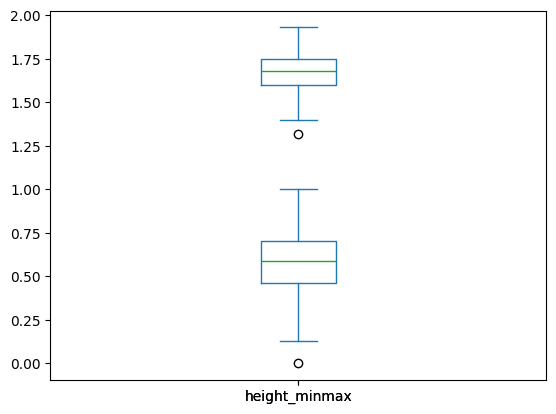

In [98]:
df['height'].plot(kind='box')
df['height_minmax'].plot(kind='box')

### 실습) 정규화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6628)

## (3) 표준화

1. **표준화(Standardization, Standard Scaling)**  
   - 각 값이 **평균에 비해 얼마나 큰지 또는 작은지**를 나타내는 것으로 데이터를 변환했을 때 평균은 0, 분산은 1이 되도록 맞춘다.

2. **z-score 계산식**

$$
z = \frac{(x - \mu)}{\sigma}
$$

   - 데이터가 평균에서 **얼마나 떨어져 있는지(거리)**를 표준편차 단위로 표현한다.

평균의 정도가 0이 되고  그 0 으로부터 얼마나 떨어져 있는지를 본다. 그래프의 분포 형태는 동일하다.

In [99]:
df = pd.read_csv('data/patient.csv')

In [105]:
df['weight_sts'] = (df['weight'] - df['weight'].mean()) /df['weight'].std()

<Axes: ylabel='Frequency'>

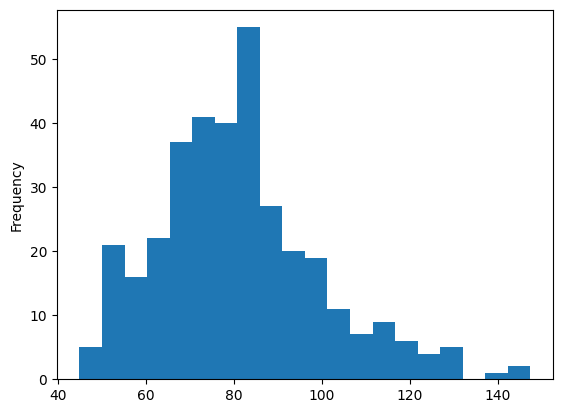

In [106]:
df['weight'].plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

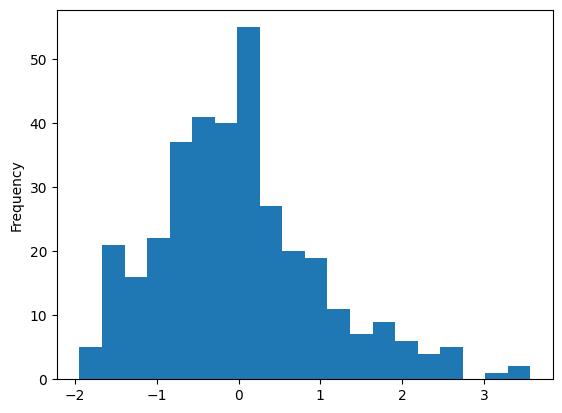

In [108]:
df['weight_sts'].plot(kind='hist',bins=20)

**데이터 스케일링 정리**

1. **정규화 (Normalization)**  
  - 모든 값을 0과 1 사이 값으로 변환하여 데이터의 최소값은 0, 최대값은 1이 되도록 조정  

2. **표준화 (Standardization)**  
  - 각 데이터가 평균에서 얼마나 떨어져 있는지를 비교하여 평균 = 0, 표준편차 = 1이 되도록 조정

### 실습) 표준화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6630)

## (4) 데이터 구간화하기

- 데이터 구간화(binning): `cut()` 함수를 사용하여 수치형 데이터를 바탕으로 여러 개의 구간으로 구간화

**연속형 데이터를 범주형으로 구간화하기**

- `pd.cut()` 함수는 숫자 데이터를 특정 구간(bins)으로 나누어 범주형(label) 데이터로 변환할 때 사용  
  - `bins`: 나눌 구간 경계값을 리스트 형태로 지정  
  - `labels`: 각 구간에 붙일 이름을 지정  
  - `right=False`: 구간의 오른쪽 경계를 포함하지 않도록 설정(기본값은 `True`)  

**코드 예시**
```python
df['새로운_컬럼'] = pd.cut(df['숫자형_컬럼'],
                          bins=[경계1, 경계2, 경계3, ...],
                          right=False,
                          labels=['라벨1', '라벨2', '라벨3', ...])


In [109]:
import pandas as pd
df = pd.read_csv('data/patient.csv')
df.head(1)

,age,sex,glucose,cholesterol,height,weight,hip,waist,diabetes
0,50,Male,385,140,1.75,78.0,41,37,Y


In [ ]:
# age 컬럼을 기준으로 20대: 20~29 -20ㄴ | ~~~~ 60대까지 표현
# df['age'].descirbe()

In [ ]:
df['age_group'] = pd.cut(df['age'],
                bins = [20,30,40,50,60,70],
                right = False, #--> [30,40) 이렇게 오른쪽은 개구간이 됨. 
                labels = ['20s','30s','40s','50s','60']
)
df['age_group'].value_counts().sort_index()

age_group
20s    63
30s    77
40s    83
50s    65
60     60
Name: count, dtype: int64

In [ ]:
# 이건 뭘까...
df['age_group'] = (df['age'] // 10 * 10).astype('str') + 's' # 2 / 연산으로 확인

- `pd.cut()`:
  - `right=True(기본값)`: 초과 이하
  - `right=False`: 이상 미만

### 실습) 데이터 구간화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6632)

환자들의 비만도를 BMI 값에 따라 분류하려고 합니다. 아래 기준에 따라 비만도를 분류해서 obesity라는 컬럼에 저장해 주세요.  

18.5 미만(저체중): under  
18.5 이상 25 미만(정상): healthy  
25 이상 30 미만(과체중): over  
30 이상(비만): obese  
주의 사항: 채점을 위해 가장 마지막 줄에는 patient_df라고 입력해서 DataFrame을 출력해 주세요.  

In [ ]:
import pandas as pd
import numpy as np

patient_df = pd.read_csv('data/patient.csv')
patient_df['bmi'] = round(patient_df['weight'] / patient_df['height']**2, 1)

# 여기에 코드를 작성하세요.

In [ ]:
df['age_group'] = pd.cut(df['age'],
                bins = [20,30,40,50,60,70],
                right = False, #--> [30,40) 이렇게 오른쪽은 개구간이 됨. 
                labels = ['20s','30s','40s','50s','60']

In [ ]:
patient_df['obesity'] = pd.cut(patient_df['weight'],
                               bins = [18.5,25,30]
                               right = False
                               labels = )

,age,sex,glucose,cholesterol,height,weight,hip,waist,diabetes,bmi
0,50,Male,385,140,1.75,78.0,41,37,Y,25.5
1,37,Female,67,214,1.63,65.8,42,34,N,24.8
2,43,Female,100,160,1.63,63.5,40,37,N,23.9
3,32,Female,90,176,1.60,114.3,58,45,N,44.6
4,20,Male,71,164,1.83,65.8,36,29,N,19.6


## (5) apply() 함수 알아보기

많이 쓰는 함수 중 하나. 잘 기억해두기.   
복잡한 후처리를 하고 싶을 때, apply함수에 넣으면 함수로 동작하게 됨  
- `apply()` : DataFrame이나 Series에 함수를 적용
- `lambda` : 이름 없는 간단한 함수를 정의할 때 사용  
- `apply(lambda ...)` : 간단한 함수를 즉석에서 만들어 각 요소나 행/열에 적용  

**사용 형태**

```python
# lambda: 함수를 한 줄로 표현.
df['새로운_컬럼'] = df['기존_컬럼'].apply(lambda x: 함수식(x)) 

def 함수1(x):
    return
    
df['새로운 컬럼'] = df['기존_컬럼'].apply(함수1)
#옵션에 따라 행 또는 열에 대한 후처리 진행
df['새로운 컬럼'] = df['기존_컬럼'].apply(함수1, axis = 1) 
df['새로운 컬럼'] = df['기존_컬럼'].apply(함수1, axis = 0)

(예시1)

In [116]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a':[4,16]})

# 제곱근
# np.sqrt는 제곱근 함수 이고, np.sqrt(number)
# 소괄호 없이 함수만 넣어줌.


def sqrt_custom(x):
    return np.sqrt(x)


df['a_sqrt'] = df['a'].apply(np.sqrt) # 방법 1
df['a_sqrt_c'] = df['a'].apply(sqrt_custom) # 방법 2 -- 함수도 넣을 수 있다. 긴 함수 커스텀해 적용바로 가능하다는 점. 
df['a_sqrt_b'] = df['a'].apply(lambda x: np.sqrt(x)) # 방법 3


In [ ]:
df = pd.DataFrame({'a':['ww','cc'], 'b':['a_c','g_w']})

def preprocessing(x):  # ,<-- 이런 식으로 apply 많이 씀 
    # print(x)
    a_col = x['a']
    b_col = x['b']
    return a_col[0]+ '__' + b_col.replace('_','-')

df['preprocessing_col']= df[['a','b']].apply(preprocessing, axis=1)
df

,a,b,preprocessing_col
0,ww,a_c,w__a-c
1,cc,g_w,c__g-w


(예시2)

In [120]:
df = pd.read_csv('data/patient.csv')

In [121]:
# age 컬럼을 age_group 함수를 이용해서 구간을 나눔
def age_group(x):
    if x < 30:
        return "20s"
    elif x < 40:
        return '30s'
    elif x < 50:
        return '40s'
    elif x < 60:
        return '50s'
    else: 
        return '60s'

df['age_group'] = df['age'].apply(age_group)
df.head(1)

,age,sex,glucose,cholesterol,height,weight,hip,waist,diabetes,age_group
0,50,Male,385,140,1.75,78.0,41,37,Y,50s


(예시3)

In [ ]:
# lambda 함수와 apply를 이용해서 bmi 컬럼 생성
# bmi : 체중 / 키 **2
# lambda x: 함수식(x) ||| 함수식(x)의 return값을 한 줄로 정의 
# def(x) : 실제 수식 + return
df = pd.read_csv('data/patient.csv')

df['bmi'] = df.apply(lambda z : z['weight'] / (z['height'])**2 , axis = 1)

(예시4)

In [ ]:
# 한 줄 조건문
# (if 참의 결과) if (조건문) else (if 거짓의 결과)
# 'y' if 2+1 == 2 else 'n'
# bmi가 25 이상이면 비만 그렇지 않으면 안 비만을 표현하는 새로운 비만여부 컬럼 생성

df['bmi'].apply(lambda x: '비만' if x >= 25 else '안비만')

(예시5)

In [ ]:
# lambda + def 
# lambda는 map과 함께 쓸 때 더 만힝 씀
# def apply
# 18.5와 23 사이의 값이라면 '정상' 그렇지 않다면 '비정상'

def isin_interval(x,n_lower,n_upper):
    if n_lower <= x <= n_upper:
        return "y"
    else: 
        return "n"

df['정상유무'] = df['bmi'].apply(lambda x: isin_interval(x,18,5,23))
df.head(1)

# [5] 날짜와 시간 데이터 다루기

## (1) 날짜 데이터 타입 설정하기

- `pd.to_datetime()`: 문자열이나 숫자 등 다양한 형태의 데이터를 날짜·시간(`datetime`) 객체로 변환하여 변환된 데이터는 시계열 분석, 시간 연산, 날짜 인덱싱 등에 활용할 수 있다.

In [124]:
import pandas as pd
df = pd.read_csv('data/order.csv')
df.dtypes

order_time                      object
category                        object
product_name                    object
price                          float64
quantity                         int64
sales                          float64
days_for_shipping(expected)      int64
shipping_time                   object
dtype: object

In [126]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['shipping_time'] =  pd.to_datetime(df['shipping_time'])

- `parse_dates` 옵션: 데이터를 불러올 때부터 지정한 컬럼으로 자동으로 날짜형으로 변환하여 불러올 수 있다.

In [128]:
df = pd.read_csv('data/order.csv', parse_dates = ['order_time','shipping_time'])
# df.dtypes

In [ ]:
# str --> .str
# datetime --> .dt

In [ ]:
# # df['order_time'].dt.year
# # df['order_time'].dt.month
# # df['order_time'].dt.day
# # df['order_time'].dt.day_name() #영어식 요일 표현
# # df['order_time'].dt.day_of_week # 0: 월요일 ~ 6: 일요일
# # df['order_time'].dt.hour
# # df['order_time'].dt.minute
# # df['order_time'].dt.second
# df['order_time'].dt.quarter #분기

0        1.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
18045    1.0
18046    1.0
18047    1.0
18048    1.0
18049    1.0
Name: order_time, Length: 18050, dtype: float64

In [132]:
# 배송데이터의 주문일자는 몇년도가 있는지
df['order_time'].dt.year.unique()

array([2015.,   nan, 2016., 2017., 2018.])

In [ ]:
# 2015년도의 데이터만 필터
mask = df['order_time'].dt.year == 2015
df[mask] # 1

df[df['order_time'].dt.year == 2015] # 2

- `order_time`의 `year` 가져오기

- `order_time`의 `month` 가져오기

- `order_time`의 `day` 가져오기

- `order_time`의 `day_of_week` 가져오기(0: 월요일, 6: 일요일)

## (2) 날짜 데이터 형식 지정하기

In [139]:
import pandas as pd
df['order_time'] = pd.to_datetime(df['order_time'])
df['shipping_time'] =  pd.to_datetime(df['shipping_time'])

target = df[['order_time','shipping_time']].dropna().reset_index(drop=True)

In [142]:
# .dt.strftime --> datetime 타입 방식을 str형식으로 우리가 원하는 형식으로 변경
# order_time 컬럼을 년도_일자_일 시간
# 각 요소들에 접근시 %
# %Y : 년도 / %m: 월 / %d : 일자 / %H: 시간 / %M : 분 / %S:초

target['date1'] = target['order_time'].dt.strftime('%Y_%m_%d %H') #

# 지저분한 str형식의 컬럼을 datetime으로 바꾸는 방법
target['date_type']= pd.to_datetime(target['date1'], format = '%Y_%m_%d %H')
target.head(1)

,order_time,shipping_time,date1,date_type
0,2015-01-01 04:54:00,2015-01-07 19:07:00,2015_01_01 04,2015-01-01 04:00:00


### 실습) 날짜와 시간 데이터 인덱싱하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/8315)

익중이는 배달 전문 음식점을 운영하고 있습니다. 다행히 맛집으로 소문이 났는지, 저녁 시간대에 들어오는 주문이 엄청 많아져서 새로운 배달 업체와 계약을 했다고 하네요. 일주일 정도 서비스를 이용해 본 뒤, 배달이 빠르게 잘 되고 있는지 배달 수수료로 얼마를 내고 있는지 등을 전반적으로 확인해 보려고 하는데요.

일단 이 업체를 이용하기 시작한 날인 2022년 10월 17일의 데이터만 뽑아서 확인해 봅시다. 주문 시각(order_time)을 기준으로 데이터를 추출해 보세요!

In [151]:
import pandas as pd

delivery_df = pd.read_csv('data/delivery.csv')
df['order_time'] = pd.to_datetime(df['order_time'])


(방법1) 2022-10-17 지정하기

In [152]:
# 실제 첫행은 2022-10-17이지만 False 나옴 -> datetime과 string의 비교 x
(df['order_time'].dt.date == '2022-10-17').head(2)

0    False
1    False
Name: order_time, dtype: bool

In [ ]:
# 시리즈나 데이터프레임에서는 dt 사용 가능
# 반면, 하나의 값에 대해서 to_datetime하면 .dt 못씀 
mask = df['order_time'].dt.date == pd.to_datetime('2022-10-17').date() # 양쪽에 .date()를 붙여 시간을 버리고 년-월-일만 딱 떼서 날짜와 비교해라라는 명확한 기준을 세운 것.
df[mask].head(1)

,order_time,category,product_name,price,quantity,sales,days_for_shipping(expected),shipping_time


(방법2) 2022년, 10월, 17일 `AND` 조건으로 지정하기

In [ ]:
df[


    
]

(방법3) 부분 문자열 인덱싱 사용하기

## (3) 날짜와 시간을 더하고 빼기

In [2]:
import pandas as pd
order_df = pd.read_csv('data/order.csv', parse_dates = ['order_time','shipping_time']) # 불러올 때 날짜형으로 변환
# ['order_time','days_for_shipping(expected)', 'shipping_time'] 컬럼만 주목
order_filter = order_df[['order_time','days_for_shipping(expected)', 'shipping_time']]

### 실습) 날짜와 시간을 더하고 빼기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/8317)


# [6] 데이터 합치기

## (1) concat(): 같은 형식의 데이터 합치기

- `pandas`에 있는 `concat()`을 사용하는데 리스트 안에 합치려는 데이터 프레임을 넣으면 된다.
  - `ignore_index=True`는 데이터프레임을 합치거나 재구성할 때 기존 인덱스를 무시하고 0부터 다시 번호를 매기는 옵션

In [7]:
english_df1 = pd.DataFrame({
    'name' : ['A', 'B', 'C'],
    'english_score' : [50, 89, 68]
})

english_df2 = pd.DataFrame({
    'name' : ['D', 'E', 'F'],
    'english_score' : [88, 91, 72]
})

math_df = pd.DataFrame({
    'name' : ['A', 'B', 'C','D', 'E', 'F'],
    'math_score' : [88, 91, 72,1,2,3]
})

In [8]:
pd.concat([english_df1,math_df], axis= 1) # concat의 axis =1 옵션은 수평방향으로 붙힘

,name,english_score,name,math_score
0,A,50.0,A,88
1,B,89.0,B,91
2,C,68.0,C,72
3,NaN,NaN,D,1
4,NaN,NaN,E,2
5,NaN,NaN,F,3


### 실습) concat()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6604)

In [10]:
df1 = pd.read_csv('data/sales_2020.csv')
df2 = pd.read_csv('data/sales_2021.csv')
df3 = pd.read_csv('data/sales_2022.csv')

total = pd.concat([df1,df2,df3], axis = 0 )

## (2) merge(): 컬럼 기준 데이터 합치기

**조인 연산(Join)**

- 두 데이터셋에 공통으로 존재하는 값을 기준(Key)으로 데이터를 하나로 합치는 것으로 Key(키)는 데이터 간 연결고리 역할을 하는 기준 값이다.(예: 고객 ID, 주문 번호 등)

- **조인의 종류**  
  - Inner Join(기본값) : 두 데이터 모두에 존재하는 키만 결합
  - Left Outer Join : 왼쪽 데이터는 모두 살리고, 오른쪽 데이터에서 일치하는 키만 결합  
  - Right Outer Join : 오른쪽 데이터는 모두 살리고, 왼쪽 데이터에서 일치하는 키만 결합  
  - Full Outer Join : 양쪽 데이터의 모든 키를 포함해 결합  

- **실무 활용**  
  - 주로 **Inner Join**과 **Left Outer Join**이 많이 사용된다.


In [13]:
import pandas as pd
employee_df = pd.read_csv('data/employee.csv')
survey_df = pd.read_csv('data/survey.csv')
display(employee_df.head(2))
display(survey_df.head(2))

,id,department,location,role,resign
0,101929,HR,China,Staff,Y
1,101625,Finance,US,Senior Director,N


,id,department,career,teamwork,reward,environment
0,101355,HR,5,4,5,4
1,100077,Sales,2,2,4,3


In [14]:
employee_df.shape, survey_df.shape

((100, 5), (76, 6))

In [ ]:
# survey id 중복이 있는가 -> id 중복은 두 파일 모두 없음
# survey_id['id'].value_counts() # 내림차순 정렬
# employee_df['id'].value_counts()
# id는 동일한데, department가 다른 경우가 있는지
# pd.merge(a,b, on= 'key', how = '방식') how : inner / outer
pd.merge(employee_df, survey_df) # 오류없이 적절하게 pandas가 판단 - how = inner default

merge1 = pd.merge(employee_df, survey_df, on = ['id','department'], how = 'inner') 
# --> inner(교집합): id와department가 두 데이터프레임에 모두 존재하는 행들만 가져옴 
# --> 설문에 참여한 직원 중 직원 명단에도 정확히 정보가 일치하는 사람만 남음
merge2 = pd.merge(employee_df, survey_df, on = ['id','department'], how = 'outer')
#


In [21]:
employee_df.shape, survey_df.shape

((100, 5), (76, 6))

In [ ]:
merge2.shape #행을 출력해서 확인해보기

(100, 9)

In [ ]:
merge3 = pd.merge(employee_df, survey_df, on = ['id','department'], how = 'left') 
# --> left를 살리고 left에 데이터가 없는 경우에만 right의 것으로 채워넣겠다.
merge4 = pd.merge(employee_df, survey_df, on = ['id','department'], how = 'right')
# left, right 이해하는데 시간 쓰지 말자 / inner outer만 기억하자

,id,department,location,role,resign,career,teamwork,reward,environment
0,101355,HR,US,Director,N,5,4,5,4
1,100077,Sales,Australia,Staff,Y,2,2,4,3
2,101844,Finance,UK,Senior Manager,N,2,3,1,5
3,101929,HR,China,Staff,Y,2,3,2,3
4,101888,HR,Australia,Senior Staff,N,4,4,3,3


- `employee`와 `survey` 두 테이블을 연결하려고 할 때 연결 고리는 중복값이 없고 결측치가 없는 값이 보통 키 값이 된다. (예: 주민등록번호 등)

(두 테이블의 연결고리인 Key값이 다른 경우)

### 실습) merge()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6636)

소행성 정보를 담고 있는 asteroid_df와 각 소행성이 속한 궤도 관련 정보를 담고 있는 orbit_df를 하나로 합쳐서, 각 소행성이 지구와 충돌할 위험이 있는지 확인하려고 합니다. 두 데이터를 inner join한 결과물을 nasa_df라는 변수에 저장해 주세요.  

참고로 asteroid_df와 orbit_df는 NASA에서 제공한 데이터를 가공해서 만든 데이터로, 조금 어렵고 복잡해 보일 수도 있는데요. 일단 지금은 각 컬럼의 의미보다는 조인 연산 과정에 좀 더 집중해서 데이터를 탐색해 주시면 됩니다.   
주의 사항: 채점을 위해 가장 마지막 줄에는 nasa_df라고 입력해서 DataFrame을 출력해 주세요.   

In [30]:
import pandas as pd

asteroid_df = pd.read_csv('data/asteroid.csv')
orbit_df = pd.read_csv('data/orbit.csv')


In [33]:
# 각 데이터의 키값을 설정
pd.merge(asteroid_df, orbit_df, left_on= 'id', right_on = 'asteroid_id') 

,id,abs_magnitude,min_est_diameter,max_est_diameter,relative_velocity,asteroid_id,orbit_id,min_orbit_inter,perihelion_dist,inclination
0,2226514,20.1,0.253837,0.567597,103175.288522,2226514,54,0.015130,0.420701,2.564450
1,3674619,21.3,0.146068,0.326618,70196.294986,3674619,8,0.018203,0.355309,2.544707
2,3644702,20.2,0.242412,0.542051,111504.879722,3644702,43,0.039390,0.468663,29.290232
3,3019647,20.6,0.201630,0.450858,86093.161070,3019647,16,0.024227,0.318180,19.803694
4,2208115,20.7,0.192555,0.430566,45195.716041,2208115,29,0.013353,0.838391,23.293402
...,...,...,...,...,...,...,...,...,...,...
152,2085938,18.6,0.506471,1.132505,48435.858841,2085938,112,0.022124,0.956925,9.145916
153,3745504,21.7,0.121494,0.271669,113607.187316,3745504,23,0.023437,0.639498,5.151032
154,2468727,20.8,0.183889,0.411188,40225.448389,2468727,29,0.034385,0.509222,16.920882
155,3736502,21.4,0.139494,0.311918,60813.804409,3736502,17,0.021474,0.948154,8.061251


## (3) join(): 인덱스 기준 데이터 합치기  

concat과 merge를 join보다 더 많이 쓰는 편  
join은 데이터프레임에서 바로 활용해서 사용  

In [ ]:
pd.concat([df1, df2]) #행 혹은 열 별로 합친다. 
pd.merge(df1, df2) # 컬럼의 특정 키값을 기준으로 합친다
df1.join(df2) # 인덱스 기준으로 합친다. 



,year,month,total_orders,gross_sales,discounts,returns,total_sales


In [42]:
import pandas as pd
employee_df = pd.read_csv('data/employee.csv')
survey_df = pd.read_csv('data/survey.csv')

employee_df = employee_df.set_index('id')
survey_df = survey_df.set_index('id')
# employee_df.join(survey_df) # department 컬럼이 겹치기 떄문에 오류
employee_df.join(survey_df, lsuffix = '_x', rsuffix='_y').shape

(100, 9)

In [43]:
import pandas as pd
employee_df = pd.read_csv('data/employee.csv')
survey_df = pd.read_csv('data/survey.csv')

employee_df = employee_df.set_index(['id', 'department']) # 멀티 인덱스 방식으로 join하기 위해 설정
survey_df = survey_df.set_index(['id', 'department'])
# employee_df.join(survey_df) # department 컬럼이 겹치기 떄문에 오류
display(employee_df.join(survey_df, how='inner').head(2))
employee_df.join(survey_df, how= 'inner').shape

,,location,role,resign,career,teamwork,reward,environment
id,department,,,,,,,
101929,HR,China,Staff,Y,2,3,2,3
101625,Finance,US,Senior Director,N,2,2,3,1


(76, 7)

### 실습) join()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6638)

## (4) merge() vs. join()

- `merge()` : 컬럼명을 기준으로 데이터를 합치는 것 --> 더 보편적으로 다양하게 쓰인다. merge만 기억해도 됨
- `join()` : 인덱스를 기준으로 데이터를 합치는 것
- 그런데 그 반대의 경우도 가능은 하다.

(`merge()`로 합치기: 인덱스를 기준으로 합치는 경우)

(`join()`으로 합치기: 하나는 컬럼, 하나는 인덱스인 경우)

## (5) 조인한 데이터로 새로운 인사이트 얻기

- `employee_df`와 `survey_df`를 합친 `company_df`로 퇴사한 사람에 대한 정보를 얻을 수 ㅇ있다.

# [7] 그룹별로 분석하기

## (1) groupby

- 그룹별로 분석할 때는 `groupby`를 사용할 수 있다.

In [46]:
nf = pd.read_csv('data/netflix.csv')
nf['release'] = pd.to_datetime(nf['release'])

In [48]:
nf.groupby(['genre']).mean(numeric_only =True) #numeric_only =True: 숫자형만 계산

,runtime,score
genre,,
Comedy,95.575758,5.518182
Documentary,81.262500,6.941250
Drama,106.440678,6.267797
Romantic comedy,101.555556,5.722222
Thriller,106.774194,5.687097


In [49]:
nf = pd.read_csv('data/netflix.csv')
nf['release'] = pd.to_datetime(nf['release'])
nf['year'] = nf['release'].dt.year

In [51]:
nf.groupby(['genre']).mean(numeric_only = True)

,runtime,score,year
genre,,,
Comedy,95.575758,5.518182,2019.848485
Documentary,81.262500,6.941250,2019.800000
Drama,106.440678,6.267797,2020.067797
Romantic comedy,101.555556,5.722222,2019.888889
Thriller,106.774194,5.687097,2019.967742


In [52]:
nf.groupby(['genre','year']).mean(numeric_only = True)

runtime     score
genre           year                      
Comedy          2019   84.250000  5.625000
                2020  100.857143  5.571429
                2021  104.428571  5.228571
Documentary     2019   82.033333  6.920000
                2020   82.611111  7.177778
                2021   76.142857  6.378571
Drama           2019  107.857143  6.335714
                2020  103.000000  6.055556
                2021  110.500000  6.533333
Romantic comedy 2019   92.714286  5.871429
                2020  105.187500  5.687500
                2021  102.500000  5.600000
Thriller        2019  105.428571  5.842857
                2020  106.944444  5.666667
                2021  107.833333  5.566667

In [53]:
nf.groupby(['genre'])['score'].mean() # 장르별 score 평균을 구하고 싶을 때

genre
Comedy             5.518182
Documentary        6.941250
Drama              6.267797
Romantic comedy    5.722222
Thriller           5.687097
Name: score, dtype: float64

In [56]:
# 수학연산 / mean, max, min, std, var, median, describe
# agg 옵션 통해서 여러개의 값도 뽑을 수 있음
nf.groupby(['genre'])['score'].describe()
nf.groupby(['genre'])['score'].agg(['max','mean','min']) # 지정한 값들만 표기 가능
nf.groupby([nf['release'].dt.year]).mean(numeric_only =True)

,runtime,score,year
release,,,
2019,90.985714,6.368571,2019.0
2020,97.072072,6.242342,2020.0
2021,98.836735,6.108163,2021.0


### 실습) groupby

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6595)

## (2) 범주형 데이터 타입 다루기

## (3) groupby와 멀티 인덱스

(2020년 데이터인 경우)

(2020년 드라마인 경우)

(2020년 드라마와 코미디인 경우)

(2019년, 2020년, 2021년의 드라마인 경우)

(연도가 많은 경우)

- 만약에 연도가 2019년, 2020년, 2021년이 아니라 많다면 일일이 적어주기 번거로우므로 years 변수를 생성해서 작업한다.

### 실습) groupby와 멀티 인덱스

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6598)

## (4) 다양한 통계값 계산하기

1. 합계 계산

2. 평균 계산

(방법1)

(방법2 : `agg`(`aggregation`) 사용)

3. 합계와 평균 계산

- 합계와 평균을 따로 구하는 대신에 한번에 여러 가지 통계량을 구하고 싶을 때에는 `agg` 안에 구하고 싶은 것을 모두 입력하면 된다.

### 실습) 다양한 통계값 계산하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6600)

## (5) 피벗 테이블

**피벗 테이블(Pivot Table)**

- 피벗 테이블은 데이터를 집계·요약하여 한눈에 보기 쉽게 만드는 표
- `pandas`의 `pivot_table()` 함수를 활용해 다양한 형태로 표 생성 가능
- 인덱스와 컬럼을 활용해 데이터 구조화

```python
pd.pivot_table(데이터프레임, values='계산할 컬럼', index='행기준', columns='열기준')
```

In [59]:
# 년도별 , genre, 스코어 평균
# Groupby
# nf.groupby(['year','genre'])['score'].mean()
# display(nf.groupby(['year','genre'])['score'].mean())
# display(nf.groupby(['year','genre'])['score'].mean().reset_index())
# pivot_table
pd.pivot_table(nf,index='year',columns='genre',values='score')  # default 연산이 mean

genre,Comedy,Documentary,Drama,Romantic comedy,Thriller
year,,,,,
2019,5.625000,6.920000,6.335714,5.871429,5.842857
2020,5.571429,7.177778,6.055556,5.687500,5.666667
2021,5.228571,6.378571,6.533333,5.600000,5.566667


In [60]:
# groupby 데이터를 pivot_table 메소드를 이용해서 변경
nf_group = nf.groupby(['year','genre'])['score'].mean().reset_index()
pd.pivot_table(nf_group,index='year',columns ='genre',values='score') # 값을 표현

genre,Comedy,Documentary,Drama,Romantic comedy,Thriller
year,,,,,
2019,5.625000,6.920000,6.335714,5.871429,5.842857
2020,5.571429,7.177778,6.055556,5.687500,5.666667
2021,5.228571,6.378571,6.533333,5.600000,5.566667


In [61]:
# aggfunc으로 여러개의 메소드 표현
pd.pivot_table(nf,index='year',columns='genre',values='score',aggfunc = 'max') # 다른 연산으로 value를 채우려면 aggfunc 방식
pd.pivot_table(nf,index='year',columns='genre',values='score',aggfunc = ['max','min'])

max                                               min              \
genre Comedy Documentary Drama Romantic comedy Thriller Comedy Documentary   
year                                                                         
2019     6.9         8.3   7.9             6.8      6.6    4.4         4.3   
2020     7.2         9.0   7.8             6.4      7.3    3.7         4.6   
2021     6.3         8.2   7.2             6.6      6.5    4.1         4.1   

                                      
genre Drama Romantic comedy Thriller  
year                                  
2019    5.2             5.4      4.4  
2020    4.1             4.1      2.6  
2021    5.4             4.5      4.4

### 실습) 피벗 테이블

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6602)

## (6) 원하는 시간 간격으로 묶기

In [63]:
order = pd.read_csv('data/order.csv')
order.head(1)

,order_time,category,product_name,price,quantity,sales,days_for_shipping(expected),shipping_time
0,2015-01-01 04:54:00,Cleats,Perfect Fitness Perfect Rip Deck,59.99,3,179.97,6,2015-01-07 19:07:00


In [64]:
order['order_time'] = pd.to_datetime(order['order_time'])
order['shipping_timke'] = pd.to_datetime(order['shipping_time'])

In [65]:
# resample() 메소드 --> 인덱스 값을 기준으로 괄호 안 의 값으로 연산을 진행

order_date = order.copy() # 새로운 변수에 기존 변수를 추가할 때 | copy() 매번 새로 불러오는 효과를 줌. 
order_date.dropna(ignore_index = True, inplace=True)
order_date.set_index('order_time', inplace=True)

# 일자별 Numeric값들의 평균
# resample 이용
order_date.resample('D').mean(numeric_only = True)

# 방법 2 groupby 이용
order.groupby([order['order_time'].dt.date]).mean(numeric_only=True) # 동일한 결과 


,price,quantity,sales,days_for_shipping(expected)
order_time,,,,
2015-01-01,151.861875,2.062500,201.226250,5.125000
2015-01-02,125.986667,2.266667,188.636667,5.200000
2015-01-03,132.208889,2.500000,214.412778,5.000000
2015-01-04,94.990526,2.210526,164.715789,4.421053
2015-01-05,142.676250,1.875000,186.607500,5.000000
...,...,...,...,...
2018-01-27,215.820000,1.000000,215.820000,5.428571
2018-01-28,215.820000,1.000000,215.820000,4.142857
2018-01-29,215.820000,1.000000,215.820000,5.714286
